In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
retail=pd.read_csv('retail_data.csv')

### Data Cleaning and Preprocessing

In [4]:
retail.head()

,Order_ID,Customer_Name,City,Product,Quantity,Price_per_unit,Order_Date,Payment_Method,Discount(%),Returned
0,1051,Bob,Hyderabad,CHARGER,NaN,NaN,2023-03-16,Credit Card,0.0,Yes
1,1092,Alice,Bangalore,Mouse,NaN,NaN,2023-08-05,Debit Card,NaN,yes
2,1014,David,Delhi,Laptop,3.0,2500.0,2023-10-04,Debit Card,15.0,No
3,1071,David,NaN,Keyboard,4.0,3000.0,2023-09-06,NaN,0.0,No
4,1060,David,Kolkata,Monitor,1.0,2500.0,2023-06-13,NaN,NaN,Yes


In [5]:
# check its shape and column info
print(retail.shape)
print(retail.info())

(105, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        105 non-null    int64  
 1   Customer_Name   105 non-null    object 
 2   City            92 non-null     object 
 3   Product         105 non-null    object 
 4   Quantity        81 non-null     float64
 5   Price_per_unit  92 non-null     float64
 6   Order_Date      105 non-null    object 
 7   Payment_Method  79 non-null     object 
 8   Discount(%)     78 non-null     float64
 9   Returned        89 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 8.3+ KB
None


In [6]:
# Identify and count missing values in each column.
print(retail.isnull().sum())

Order_ID           0
Customer_Name      0
City              13
Product            0
Quantity          24
Price_per_unit    13
Order_Date         0
Payment_Method    26
Discount(%)       27
Returned          16
dtype: int64


In [7]:
# Drop duplicates and compare the shape before and after.
a=retail.drop_duplicates()
print(a.shape)

(100, 10)


#### The shape before dropping duplicates was (105,10) and after dropping is (100,10)

In [8]:
# Fill missing values in Quantity and Price_per_unit with the median.
retail['Quantity']=retail['Quantity'].fillna(retail['Quantity'].median())
retail['Price_per_unit']=retail['Price_per_unit'].fillna(retail['Price_per_unit'].median())
retail.head()

,Order_ID,Customer_Name,City,Product,Quantity,Price_per_unit,Order_Date,Payment_Method,Discount(%),Returned
0,1051,Bob,Hyderabad,CHARGER,2.0,2000.0,2023-03-16,Credit Card,0.0,Yes
1,1092,Alice,Bangalore,Mouse,2.0,2000.0,2023-08-05,Debit Card,NaN,yes
2,1014,David,Delhi,Laptop,3.0,2500.0,2023-10-04,Debit Card,15.0,No
3,1071,David,NaN,Keyboard,4.0,3000.0,2023-09-06,NaN,0.0,No
4,1060,David,Kolkata,Monitor,1.0,2500.0,2023-06-13,NaN,NaN,Yes


#### The median of Quantity is 2.0 and for Price per unit is 2000.0 hence wherever there was missing value the median of quantity and price per unit was placed

In [9]:
# Standardize the Product and Returned columns to lowercase.
retail['Product']=retail['Product'].str.lower()
retail['Returned']=retail['Returned'].str.lower()
retail.head()

,Order_ID,Customer_Name,City,Product,Quantity,Price_per_unit,Order_Date,Payment_Method,Discount(%),Returned
0,1051,Bob,Hyderabad,charger,2.0,2000.0,2023-03-16,Credit Card,0.0,yes
1,1092,Alice,Bangalore,mouse,2.0,2000.0,2023-08-05,Debit Card,NaN,yes
2,1014,David,Delhi,laptop,3.0,2500.0,2023-10-04,Debit Card,15.0,no
3,1071,David,NaN,keyboard,4.0,3000.0,2023-09-06,NaN,0.0,no
4,1060,David,Kolkata,monitor,1.0,2500.0,2023-06-13,NaN,NaN,yes


#### The upper case letter was changed to lower case letter in Product and Returned column

In [10]:
# Replace missing City values with the mode.
retail['City']=retail['City'].fillna(retail['City'].mode()[0])
retail.head(20)

,Order_ID,Customer_Name,City,Product,Quantity,Price_per_unit,Order_Date,Payment_Method,Discount(%),Returned
0,1051,Bob,Hyderabad,charger,2.0,2000.0,2023-03-16,Credit Card,0.0,yes
1,1092,Alice,Bangalore,mouse,2.0,2000.0,2023-08-05,Debit Card,NaN,yes
2,1014,David,Delhi,laptop,3.0,2500.0,2023-10-04,Debit Card,15.0,no
3,1071,David,Mumbai,keyboard,4.0,3000.0,2023-09-06,NaN,0.0,no
4,1060,David,Kolkata,monitor,1.0,2500.0,2023-06-13,NaN,NaN,yes
5,1020,Eva,Mumbai,laptop,2.0,2000.0,2023-12-23,Credit Card,NaN,no
6,1082,Alice,Mumbai,laptop,2.0,1500.0,2023-07-11,Cash,10.0,NaN
7,1086,Eva,Hyderabad,mouse,1.0,2000.0,2023-08-15,Credit Card,NaN,no
8,1074,Grace,Mumbai,charger,2.0,1000.0,2023-06-26,Cash,NaN,yes
9,1074,Eva,Mumbai,charger,3.0,1500.0,2023-04-09,Cash,NaN,no


In [11]:
# Remove rows where Order_ID or Customer_Name is missing (if any).
retail=retail.dropna(subset=['Order_ID','Customer_Name'])

#### There was no row without Order_ID and Customer Name

In [12]:
# Convert the Discount(%) column to integer type.
retail['Discount(%)']=retail['Discount(%)'].fillna(0).astype(int)
retail.head()

,Order_ID,Customer_Name,City,Product,Quantity,Price_per_unit,Order_Date,Payment_Method,Discount(%),Returned
0,1051,Bob,Hyderabad,charger,2.0,2000.0,2023-03-16,Credit Card,0,yes
1,1092,Alice,Bangalore,mouse,2.0,2000.0,2023-08-05,Debit Card,0,yes
2,1014,David,Delhi,laptop,3.0,2500.0,2023-10-04,Debit Card,15,no
3,1071,David,Mumbai,keyboard,4.0,3000.0,2023-09-06,NaN,0,no
4,1060,David,Kolkata,monitor,1.0,2500.0,2023-06-13,NaN,0,yes


In [13]:
# Create a new column Total_Amount
retail['Total_Amount']=retail['Quantity']*retail['Price_per_unit']*(1-retail['Discount(%)']/100)
retail.head()

,Order_ID,Customer_Name,City,Product,Quantity,Price_per_unit,Order_Date,Payment_Method,Discount(%),Returned,Total_Amount
0,1051,Bob,Hyderabad,charger,2.0,2000.0,2023-03-16,Credit Card,0,yes,4000.0
1,1092,Alice,Bangalore,mouse,2.0,2000.0,2023-08-05,Debit Card,0,yes,4000.0
2,1014,David,Delhi,laptop,3.0,2500.0,2023-10-04,Debit Card,15,no,6375.0
3,1071,David,Mumbai,keyboard,4.0,3000.0,2023-09-06,NaN,0,no,12000.0
4,1060,David,Kolkata,monitor,1.0,2500.0,2023-06-13,NaN,0,yes,2500.0


#### The new column Total_Amount is created

## Data Analysis using Pandas

In [14]:
# Find the top 5 cities by total revenue.
retail.groupby('City')['Total_Amount'].sum().sort_values(ascending=False).head(5)

City
Mumbai       156825.0
Kolkata       65550.0
Hyderabad     59300.0
Bangalore     58925.0
Delhi         40900.0
Name: Total_Amount, dtype: float64

#### The top 5 cities are listed above

In [15]:
# What is the average order value (AOV)?
retail['Total_Amount'].mean()

np.float64(3904.7619047619046)

In [16]:
# Count how many orders used each payment method.
retail['Payment_Method'].value_counts()

Payment_Method
UPI            23
Cash           20
Debit Card     18
Credit Card    18
Name: count, dtype: int64

In [17]:
# Find the most sold product by quantity.
retail.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

Product
laptop       54.0
headphone    49.0
keyboard     48.0
monitor      32.0
charger      22.0
tablet       21.0
mouse        17.0
Name: Quantity, dtype: float64

#### The most sold product is Laptop

In [18]:
# Calculate the average discount given per product.
retail.groupby('Product')['Discount(%)'].mean()

Product
charger      2.777778
headphone    7.352941
keyboard     5.000000
laptop       5.909091
monitor      2.631579
mouse        4.500000
tablet       8.333333
Name: Discount(%), dtype: float64

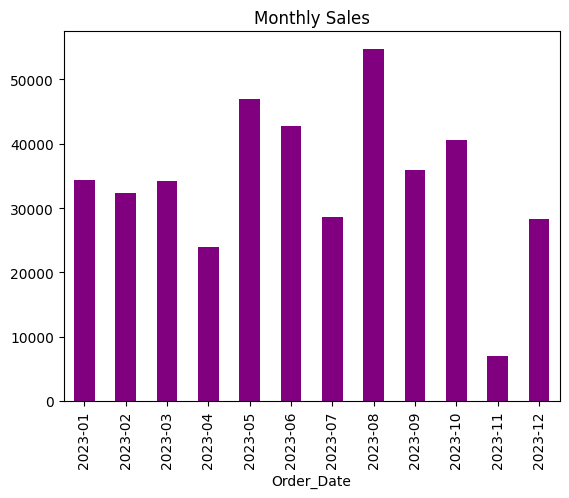

In [19]:
# Get monthly sales totals and plot them using a bar chart.
retail['Order_Date']=pd.to_datetime(retail['Order_Date'])
monthly = retail.groupby(retail['Order_Date'].dt.to_period('M'))['Total_Amount'].sum()
monthly.plot(kind='bar', title='Monthly Sales',color='purple')
plt.show()

#### Highest sales : August          &           Lowest sales : July

In [20]:
# What are the top 3 cities where returns happened the most?
retail[(retail['Returned']=='yes')]['City'].value_counts().head(3)

City
Mumbai       13
Kolkata       9
Hyderabad     7
Name: count, dtype: int64

#### The top 3 cities where the returned happened the most

In [21]:
# Find the customer who spent the most in total.
retail.groupby('Customer_Name')['Total_Amount'].sum().sort_values(ascending=False)

Customer_Name
David      80375.0
Alice      77900.0
Charlie    68225.0
Grace      67875.0
Eva        59600.0
Bob        29250.0
Frank      26775.0
Name: Total_Amount, dtype: float64

In [22]:
#Count how many orders have quantity more than 2 and discount more than 5%.
retail[(retail['Quantity']>2)&(retail['Discount(%)']>5)]

,Order_ID,Customer_Name,City,Product,Quantity,Price_per_unit,Order_Date,Payment_Method,Discount(%),Returned,Total_Amount
2,1014,David,Delhi,laptop,3.0,2500.0,2023-10-04,Debit Card,15,no,6375.0
21,1063,Charlie,Mumbai,laptop,3.0,3000.0,2023-08-05,NaN,15,yes,7650.0
42,1054,Charlie,Bangalore,headphone,4.0,2000.0,2023-05-24,Debit Card,10,yes,7200.0
44,1002,Alice,Chennai,headphone,4.0,1000.0,2023-04-09,Debit Card,15,yes,3400.0
61,1059,Bob,Kolkata,headphone,4.0,500.0,2023-08-23,Cash,15,no,1700.0
66,1034,Grace,Mumbai,laptop,4.0,2500.0,2023-01-09,NaN,15,no,8500.0
67,1077,Grace,Bangalore,laptop,4.0,2000.0,2023-03-15,Cash,15,no,6800.0
73,1005,Eva,Kolkata,headphone,4.0,2000.0,2023-06-17,NaN,10,NaN,7200.0
76,1053,Eva,Hyderabad,headphone,4.0,2000.0,2023-05-02,NaN,10,no,7200.0
78,1062,Charlie,Mumbai,tablet,3.0,3000.0,2023-01-05,Credit Card,10,no,8100.0


### Numpy Operations

In [23]:
# Use NumPy to calculate the overall mean and standard deviation of Total_Amount.
retail['Total_Amount']=retail['Total_Amount'].to_numpy()
print(retail['Total_Amount'].mean())
print(retail['Total_Amount'].std())

3904.7619047619046
2465.163766302078


In [24]:
# Create a NumPy array of all Price_per_unit and find the 90th percentile.
retail['Price_per_unit']=retail['Price_per_unit'].to_numpy()
print(np.percentile(retail['Price_per_unit'],90))

3000.0


In [25]:
# Using NumPy, count how many orders had a discount greater than the average discount.
retail['Discount(%)']=retail['Discount(%)'].to_numpy()
print(np.sum(retail['Discount(%)']>retail['Discount(%)'].mean()))

36


In [26]:
# Sort the Total_Amount array in descending order using NumPy.
retail.sort_values(by='Total_Amount',ascending=False).head(5)

,Order_ID,Customer_Name,City,Product,Quantity,Price_per_unit,Order_Date,Payment_Method,Discount(%),Returned,Total_Amount
3,1071,David,Mumbai,keyboard,4.0,3000.0,2023-09-06,NaN,0,no,12000.0
103,1071,David,Mumbai,keyboard,4.0,3000.0,2023-09-06,NaN,0,no,12000.0
10,1087,Alice,Mumbai,headphone,4.0,2500.0,2023-02-05,NaN,0,yes,10000.0
48,1072,Frank,Mumbai,tablet,4.0,2500.0,2023-05-24,Cash,5,yes,9500.0
31,1058,Alice,Mumbai,keyboard,3.0,3000.0,2023-01-19,NaN,5,yes,8550.0


In [27]:
# Normalize the Price_per_unit column using min-max normalization (NumPy). 
normalize=(retail['Price_per_unit']-retail['Price_per_unit'].min())/(retail['Price_per_unit'].max()-retail['Price_per_unit'].min())
print(normalize.head())

0    0.6
1    0.6
2    0.8
3    1.0
4    0.8
Name: Price_per_unit, dtype: float64


### Visualization using Matplotlib

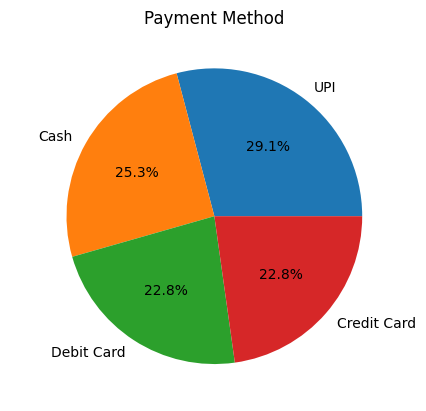

In [28]:
# Plot a pie chart of order distribution by payment method.
retail['Payment_Method'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Payment Method')
plt.ylabel(' ')
plt.show()

#### The customers use UPI the most for payments

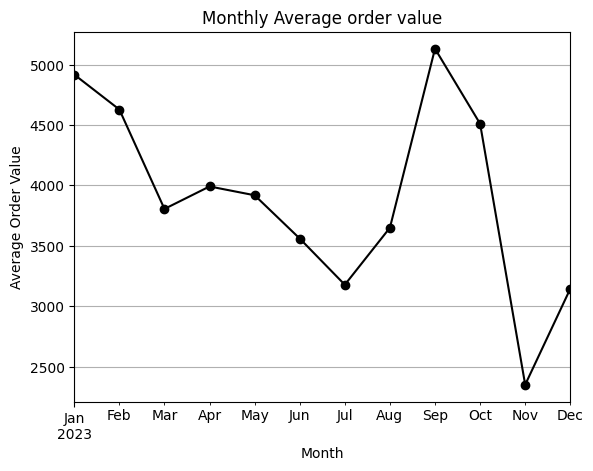

In [29]:
# Create a line plot for monthly average order value.
retail['Order_Date'] = pd.to_datetime(retail['Order_Date'], errors='coerce')
aov=retail.groupby(retail['Order_Date'].dt.to_period('M'))['Total_Amount'].mean().plot(kind='line',marker='o',title='Monthly Average order value',color='k')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.grid()
plt.show()

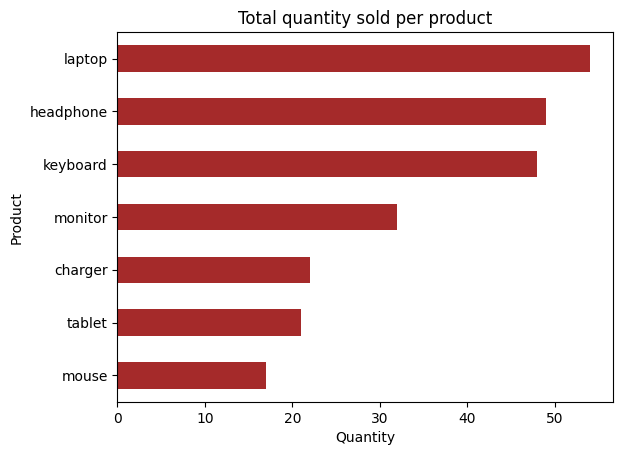

In [30]:
# Bar chart showing total quantity sold per product.
retail.groupby('Product')['Quantity'].sum().sort_values().plot(kind='barh',title='Total quantity sold per product',color='brown')
plt.xlabel('Quantity')
plt.show()

In [31]:
# final dataset
retail.head(20)

,Order_ID,Customer_Name,City,Product,Quantity,Price_per_unit,Order_Date,Payment_Method,Discount(%),Returned,Total_Amount
0,1051,Bob,Hyderabad,charger,2.0,2000.0,2023-03-16,Credit Card,0,yes,4000.0
1,1092,Alice,Bangalore,mouse,2.0,2000.0,2023-08-05,Debit Card,0,yes,4000.0
2,1014,David,Delhi,laptop,3.0,2500.0,2023-10-04,Debit Card,15,no,6375.0
3,1071,David,Mumbai,keyboard,4.0,3000.0,2023-09-06,NaN,0,no,12000.0
4,1060,David,Kolkata,monitor,1.0,2500.0,2023-06-13,NaN,0,yes,2500.0
5,1020,Eva,Mumbai,laptop,2.0,2000.0,2023-12-23,Credit Card,0,no,4000.0
6,1082,Alice,Mumbai,laptop,2.0,1500.0,2023-07-11,Cash,10,NaN,2700.0
7,1086,Eva,Hyderabad,mouse,1.0,2000.0,2023-08-15,Credit Card,0,no,2000.0
8,1074,Grace,Mumbai,charger,2.0,1000.0,2023-06-26,Cash,0,yes,2000.0
9,1074,Eva,Mumbai,charger,3.0,1500.0,2023-04-09,Cash,0,no,4500.0
